In [1]:
import os 
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [3]:
import string


class State(TypedDict):
    a:int
    b:int
    c:int

    equation:str
    descriminator:float
    final:str
    

In [4]:
from typing import Literal


def equvation_generator(state:State)->State:
    state["equation"] = f'{state["a"]}x^2 + {state["b"]}x + {state["c"]}'
    return state

def calculate_discriminant(state:State)->State:
    state["descriminator"] = state["b"]**2 - (4*state["a"]*state["c"])
    return state

def real_roots(state: State)->State:
    root1 = (-state["b"] + state["descriminator"]**0.5)/(2*state["a"])
    root2 = (-state["b"] - state["descriminator"]**0.5)/(2*state["a"])
    state["final"] = f'The roots are {root1} and {root2}'
    return state

def repeated_roots(state: State)->State:
    root = (-state["b"])/(2*state["a"])
    state["final"] = f'Only repeating root is {root}'
    return state

def no_real_roots(state: State)->State:
    state["final"] = f'No real roots'
    return state

def check_condition(state:State)->Literal["real_roots", "repeated_roots", "no_real_roots"]:
    if state['descriminator'] > 0:
        return "real_roots"
    elif state['descriminator'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"

In [7]:
graph = StateGraph(State)

graph.add_node("equvation_generator", equvation_generator)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("real_roots", real_roots)
graph.add_node("repeated_roots", repeated_roots)
graph.add_node("no_real_roots", no_real_roots)
# graph.add_node("check_condition", check_condition)

In [8]:
graph.add_edge(START, "equvation_generator")
graph.add_edge("equvation_generator", "calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant", check_condition)
graph.add_edge("real_roots", END)
graph.add_edge("repeated_roots", END)
graph.add_edge("no_real_roots", END)

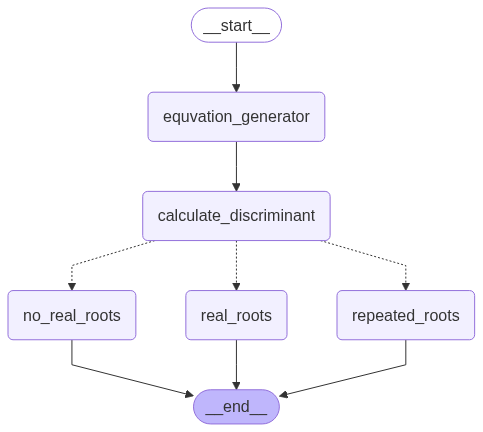

In [9]:
workflow = graph.compile()
workflow

In [ ]:
initial_state = {
    'a': 2, 
    'b': 4,
    'c': 2
}

workflow.invoke(initial_state)

{'a': 2,
 'b': 4,
 'c': 2,
 'equation': '2x^2 + 4x + 2',
 'descriminator': 0,
 'final': 'Only repeating root is -1.0'}